In [1]:
import pandas as pd
import numpy as np

parse_data=["FILING_DATE"]
data=pd.read_csv("D://stock_data/all_mapping_0304.csv",parse_dates=parse_data,encoding="ISO-8859-1")
# data

In [2]:
US_data=data[data["COUNTRY"]=="United States"]
US_data.reset_index(inplace=True)
US_data
# US_data_out=US_data["FILING_DATE","word_count"]us_data_q
parse_data1=["PRICEDATE"]
stock_data=pd.read_csv("D://stock_data/us_stock.csv",parse_dates=parse_data1)
stock_data

,TRADINGITEMID,TICKERSYMBOL,PRICEDATE,OPEN,CLOSE,VOLUME,ADJ_OPEN,ADJ_CLOSE,ADJ_VOLUME,CURRENCYNAME,TRADINGSTATUS,EXCHANGENAME,IMPORTANCELEVEL,Unnamed: 13,TICKERSYMBOL_right,REGION,COUNTRY
0,2585893,AAON,2006-01-31,19.019995,19.199997,27894.0,3.757036,3.792592,141211.0,US Dollar,Active,Nasdaq Global Select,3.0,1,AAON,United States and Canada,United States
1,2585893,AAON,2006-02-28,21.949998,21.870000,34798.0,4.335802,4.320000,176167.0,US Dollar,Active,Nasdaq Global Select,3.0,1,AAON,United States and Canada,United States
2,2585893,AAON,2006-03-31,23.389995,23.909995,20275.0,4.620246,4.722962,102640.0,US Dollar,Active,Nasdaq Global Select,3.0,1,AAON,United States and Canada,United States
3,2585893,AAON,2006-04-28,26.499995,27.419999,20820.0,5.234567,5.416296,105403.0,US Dollar,Active,Nasdaq Global Select,3.0,1,AAON,United States and Canada,United States
4,2585893,AAON,2006-05-31,23.259894,23.319996,8695.0,4.594547,4.606419,44016.0,US Dollar,Active,Nasdaq Global Select,3.0,1,AAON,United States and Canada,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761998,1800445970,FTAI,2022-10-31,17.410000,17.380000,759420.0,17.410000,17.380000,759420.0,US Dollar,Active,Nasdaq Global Select,3.0,51363,FTAI,United States and Canada,United States
761999,1800445970,FTAI,2022-11-30,16.730000,17.520000,785584.0,16.730000,17.520000,785584.0,US Dollar,Active,Nasdaq Global Select,3.0,51363,FTAI,United States and Canada,United States
762000,1800445970,FTAI,2022-12-30,16.880000,17.120000,615933.0,16.880000,17.120000,615933.0,US Dollar,Active,Nasdaq Global Select,3.0,51363,FTAI,United States and Canada,United States
762001,1800445970,FTAI,2023-01-31,22.130000,22.360000,328360.0,22.130000,22.360000,328360.0,US Dollar,Active,Nasdaq Global Select,3.0,51363,FTAI,United States and Canada,United States


In [3]:
time=pd.date_range(start='2006-01-01', freq='M', periods=206)
# str(time[3])
time
US_data_out=US_data[["FILING_DATE","word_count","TRADINGITEMID"]]
US_data_out.set_index(US_data["FILING_DATE"],drop=False,inplace=True)
gp=US_data_out.groupby(US_data_out.index.to_period(freq="m"))
gp.size()
len(time)

206

In [4]:


# time2=pd.date_range(start=str(time[2]), freq='M', periods=2)
# time2
# type(pd.to_datetime(time[0])[0])

open_day=time[0]
close_day=time[1]

# 获取每月中word_count 值最高和最低的五个股票
def get_up_low(open_day,close_day):
    con1=US_data_out['FILING_DATE']>=open_day
    con2=US_data_out['FILING_DATE']<close_day
    us_data_q=US_data_out[con1&con2]

    # us_data_q=US_data_out[US_data_out["FILING_DATE"]>=pd.to_datetime(time[0])& US_data_out["FILING_DATE"]<=pd.to_datetime(time[2])]
    us_data_q=us_data_q.sort_values(['word_count'])
    # us_data_q["TRADINGITEMID"].duplicated()
    us_data_q=us_data_q["TRADINGITEMID"].drop_duplicates()
    stock_id_u=us_data_q.head(5)
    up=stock_id_u.to_list()
    stock_id_d=us_data_q.tail(5)
    down=stock_id_d.to_list()
    return up,down
# down


In [5]:
import math
# con1=US_data_out['FILING_DATE']>=open_day
# con2=US_data_out['FILING_DATE']<close_day
# us_data_q=US_data_out[con1&con2]

# # us_data_q=US_data_out[US_data_out["FILING_DATE"]>=pd.to_datetime(time[0])& US_data_out["FILING_DATE"]<=pd.to_datetime(time[2])]
# us_data_q=us_data_q.sort_values(['word_count'])
# # us_data_q["TRADINGITEMID"].duplicated()
# us_data_q=us_data_q["TRADINGITEMID"].drop_duplicates()
# stock_id_u=us_data_q.head(5)
# up=stock_id_u.to_list()
# stock_id_d=us_data_q.tail(5)
# down=stock_id_d.to_list()
# part1=stock_data['PRICEDATE']>open_day
# part2=stock_data['PRICEDATE']<=close_day
# part3=stock_data["TRADINGITEMID"]==up[2]
# stockdata=stock_data[part3&part2&part1]
# if(stockdata.empty==False):
#     re=(stockdata["ADJ_CLOSE"]-stockdata["ADJ_OPEN"])/stockdata["ADJ_OPEN"]
#     val=re.tail().values[0]
# else:
#     val=np.nan


# val
# # stockdata.empty
# math.isnan(val)

True

In [6]:
# us_data_q


#通过两组高低投资组合中的股票提取当月的股票价格并得到回报
def get_re(open_day,close_day,stock_id):
    part1=stock_data['PRICEDATE']>open_day
    part2=stock_data['PRICEDATE']<=close_day
    part3=stock_data["TRADINGITEMID"]==stock_id
    stockdata=stock_data[part3&part2&part1]
    if(stockdata.empty==False):
        re=(stockdata["ADJ_CLOSE"]-stockdata["ADJ_OPEN"])/stockdata["ADJ_OPEN"]
        val=re.tail().values[0]
    else:
        val=np.nan
    return val

In [7]:
up_v=[]
down_v=[]

#第一个循环将跑完整个股票日期从2006到2023
for i in range(len(time)-1):
    open_day=time[i]
    close_day=time[i+1]
    print(open_day)
    #获取两组股票
    up,down=get_up_low(open_day,close_day)
    temp=0
    #在低值组通过累加取均值得到portfolio回报并填入新表
    for i in down:
        flag=0
        if(math.isnan(get_re(open_day,close_day,i))==False):
            temp+=get_re(open_day,close_day,i)
        else:
            flag+=1

    if((len(down)-flag)!=0):
        down_t=temp/(len(down)-flag)
        down_v.append(down_t)
    else:
        down_v.append(0)

    for i in up:
        if(math.isnan(get_re(open_day,close_day,i))==False):
            temp+=get_re(open_day,close_day,i)
        else:
            flag+=1

    if((len(down)-flag)!=0):
        up_t=temp/(len(down)-flag)
        up_v.append(up_t)
    else:
        up_v.append(0)

len(up_v)

2006-01-31 00:00:00
2006-02-28 00:00:00
2006-03-31 00:00:00
2006-04-30 00:00:00
2006-05-31 00:00:00
2006-06-30 00:00:00
2006-07-31 00:00:00
2006-08-31 00:00:00
2006-09-30 00:00:00
2006-10-31 00:00:00
2006-11-30 00:00:00
2006-12-31 00:00:00
2007-01-31 00:00:00
2007-02-28 00:00:00
2007-03-31 00:00:00
2007-04-30 00:00:00
2007-05-31 00:00:00
2007-06-30 00:00:00
2007-07-31 00:00:00
2007-08-31 00:00:00
2007-09-30 00:00:00
2007-10-31 00:00:00
2007-11-30 00:00:00
2007-12-31 00:00:00
2008-01-31 00:00:00
2008-02-29 00:00:00
2008-03-31 00:00:00
2008-04-30 00:00:00
2008-05-31 00:00:00
2008-06-30 00:00:00
2008-07-31 00:00:00
2008-08-31 00:00:00
2008-09-30 00:00:00
2008-10-31 00:00:00
2008-11-30 00:00:00
2008-12-31 00:00:00
2009-01-31 00:00:00
2009-02-28 00:00:00
2009-03-31 00:00:00
2009-04-30 00:00:00
2009-05-31 00:00:00
2009-06-30 00:00:00
2009-07-31 00:00:00
2009-08-31 00:00:00
2009-09-30 00:00:00
2009-10-31 00:00:00
2009-11-30 00:00:00
2009-12-31 00:00:00
2010-01-31 00:00:00
2010-02-28 00:00:00


205

In [8]:
#将两组数据写入新表
portfolio=pd.DataFrame({'date':pd.date_range(start='2006-01-01', freq='M', periods=205)})
portfolio["up_p"]=up_v
portfolio["down_p"]=down_v
portfolio['up-down']=portfolio["up_p"]-portfolio["down_p"]
portfolio

,date,up_p,down_p,up-down
0,2006-01-31,-0.030943,-0.014485,-0.016458
1,2006-02-28,-0.024524,-0.004082,-0.020443
2,2006-03-31,0.006415,0.000400,0.006015
3,2006-04-30,0.025193,0.010927,0.014266
4,2006-05-31,-0.016750,-0.003126,-0.013624
...,...,...,...,...
200,2022-09-30,0.004718,0.000384,0.004334
201,2022-10-31,-0.019483,0.001644,-0.021126
202,2022-11-30,-0.013973,-0.005589,-0.008384
203,2022-12-31,0.033398,0.006367,0.027031


<function matplotlib.pyplot.show(close=None, block=None)>

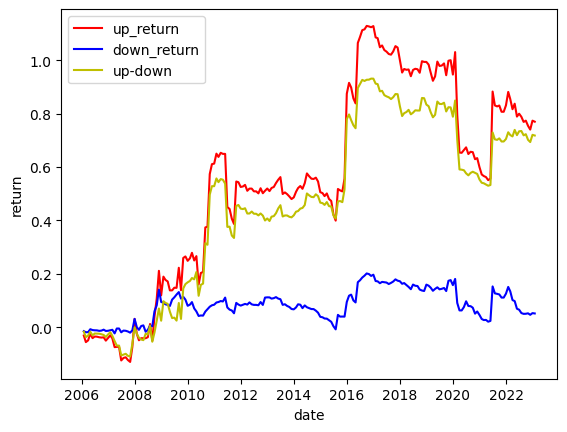

In [9]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(portfolio["date"],portfolio["up_p"].cumsum(),'r',label='up_return')
plt.plot(portfolio["date"],portfolio["down_p"].cumsum(),'b',label='down_return')
plt.plot(portfolio["date"],portfolio["up-down"].cumsum(),'y',label='up-down')
plt.xlabel("date")
plt.ylabel("return")
plt.legend() 
plt.show

In [10]:
portfolio.to_csv("E://stock_data//US_backtest_portfolio.csv",header=True,index=0)